In [1]:
# %load startup
import numpy as np
from pathlib import Path
import time

from IPython.core.display import display, HTML
display(HTML("<style>"
             + "#notebook { padding-top:0px !important; } "
             + ".container { width:100% !important; } "
             + ".end_space { min-height:0px !important; } "
             + "</style>"))

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

import pandas as pd
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

import pprint
pp = pprint.PrettyPrinter(indent=4, width=100)

import logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(module)s:%(lineno)d %(funcName)s %(levelname)s %(message)s')

(array([-0.  ,  0.  ,  0.  ,  0.  ,  0.01,  0.01,  0.01,  0.02,  0.02,
         0.02,  0.02]), <a list of 11 Text yticklabel objects>)

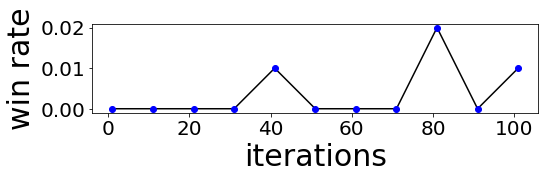

In [43]:
win_rates = np.array([0.0, 0.0, 0.0, 0.0, 0.01, 0.0, 0.0, 0.0, 0.02, 0.0, 0.01])
x = [1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101]
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
ax.plot(x, win_rates, c='black')
ax.plot(x, win_rates, 'bo')
ax.set_aspect(1000)
ax.set_xlabel('iterations', fontsize=30)
ax.set_ylabel('win rate', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

(array([-90., -80., -70., -60., -50., -40., -30., -20.]),
 <a list of 8 Text yticklabel objects>)

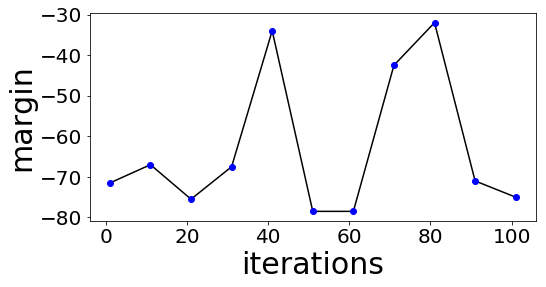

In [44]:
margins = np.array([71.5, 67, 75.5, 67.5, 34, 78.5, 78.5, 42.5, 32, 71.0, 75.0]) * (-1)
x = [1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101]
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
ax.plot(x, margins, c='black')
ax.plot(x, margins, 'bo')
ax.set_aspect(1)
ax.set_xlabel('iterations', fontsize=30)
ax.set_ylabel('margin', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

(array([-0.03,  0.  ,  0.03,  0.05,  0.08,  0.1 ,  0.13,  0.15,  0.18,
         0.2 ]), <a list of 10 Text yticklabel objects>)

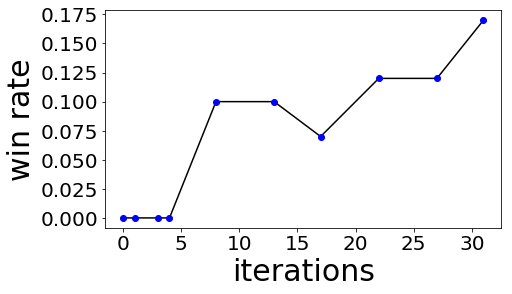

In [49]:
win_rates = np.array([0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.07, 0.12, 0.12, 0.17])
x = [0, 1, 3, 4, 8, 13, 17, 22, 27, 31, 32]
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
ax.plot(x, win_rates, c='black')
ax.plot(x, win_rates, 'bo')
ax.set_aspect(100)
ax.set_xlabel('iterations', fontsize=30)
ax.set_ylabel('win rate', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

(array([-90., -80., -70., -60., -50., -40., -30., -20., -10.,   0.,  10.]),
 <a list of 11 Text yticklabel objects>)

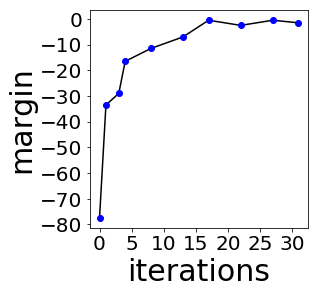

In [51]:
margins = np.array([77.5, 33.5, 29, 16.5, 11.5, 7.0, 0.5, 2.5, 0.5, 1.5]) * (-1)
x = [0, 1, 3, 4, 8, 13, 17, 22, 27, 31]
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
ax.plot(x, margins, c='black')
ax.plot(x, margins, 'bo')
ax.set_aspect(0.4)
ax.set_xlabel('iterations', fontsize=30)
ax.set_ylabel('margin', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

(array([-50., -40., -30., -20., -10.,   0.,  10.]),
 <a list of 7 Text yticklabel objects>)

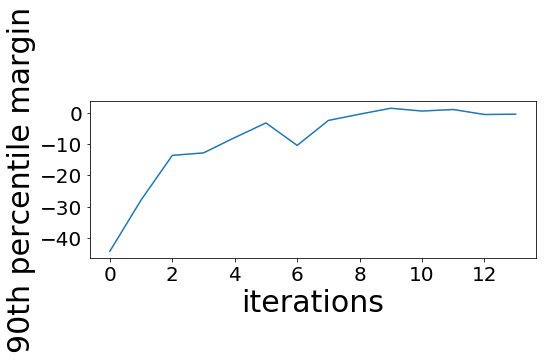

In [24]:
margins = np.array([44.3, 27.9, 13.6, 12.8, 7.9, 3.2, 10.4, 2.4, 0.4, -1.5, -0.6, -1.1, 0.5, 0.4]) * (-1)
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
ax.plot(x, margins)
ax.set_aspect(0.1)
ax.set_xlabel('iterations', fontsize=30)
ax.set_ylabel('median margin', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

In [11]:
from model_config import ModelConfig

def show_result(game_result_path, verbose=False):
    game_result_path = Path(game_result_path)
    paths = [(int(f.stem.split('_')[1]), f) for f in (game_result_path.glob('*.csv'))]
    paths.sort(key=lambda x: x[0])
    for game_number, csv_file in paths:
        game_result_pd = pd.read_csv(csv_file)
        if 'reward' in game_result_pd:
            rewards = game_result_pd['reward'].values
            win_rate = np.sum(rewards>0)/len(rewards) 
        else:
            assert 'black_win' in game_result_pd
            win_rate = float(np.mean(game_result_pd['black_win'].values))
        median_time = np.median(game_result_pd['time'].values)
        game_config_file = game_result_path/f'config_{game_number}.yaml'
        if game_config_file.exists():
            config = ModelConfig.from_yaml(game_config_file)
            print(f'{game_number}: B={win_rate}, '
                  f'#={len(game_result_pd)}, '
                  f'T={median_time:.3f}, '
                  f'S={config.mcts_num_rollout}, '
                  f'K={config.komi}, '
                  f'W={config.weight_root}')
        else:
            print(f'{game_number}: B={win_rate}, '
                  f'#={len(game_result_pd)}, '
                  f'T={median_time:.3f}')
        if verbose:
            print(game_result_pd.describe())

In [15]:
show_result('/home/peng_liu/src/tmp/game_result/random_vs_random/')

2: black win rate=0.766, num_games=1000, time/game=0.002, rollout=1000, komi=0
1: black win rate=0.45, num_games=100, time/game=0.002


In [17]:
show_result('/home/peng_liu/src/tmp/game_result/nn_vs_random/')

1: B=0.157, #=1000, T=0.365
2: B=0.763, #=1000, T=0.090, S=1000, K=0.0, W=/tmp/test_pg/iter_1/
3: B=0.495, #=1000, T=0.306, S=1000, K=0.5, W=/tmp/test_pg/start/
4: B=0.478, #=1000, T=0.305, S=1000, K=0.5, W=/tmp/test_pg/1/
5: B=0.465, #=1000, T=0.301, S=1000, K=0.5, W=/tmp/test_pg/2/
6: B=0.455, #=1000, T=0.299, S=1000, K=0.5, W=/tmp/test_pg/3/
7: B=0.441, #=1000, T=0.299, S=1000, K=0.5, W=/tmp/test_pg/4/
8: B=0.427, #=1000, T=0.312, S=1000, K=0.5, W=/tmp/test_pg/5/
9: B=0.479, #=1000, T=0.307, S=1000, K=0.5, W=/tmp/test_pg/6/


In [13]:
show_result('/home/peng_liu/src/tmp/game_result/mcts_vs_random/')

0: B=1.0, #=10, T=26.256
1: B=0.99, #=100, T=29.329, S=1000, K=0.0, W=
2: B=0.959, #=1000, T=22.138, S=1000, K=0.0, W=
4: B=0.98, #=100, T=7.702, S=100, K=0.5, W=


In [55]:
show_result('/home/peng_liu/src/tmp/game_result/mcts_vs_pachi/')

0: B=0.0, #=100, T=306.842
1: B=0.156, #=1000, T=35.106, S=1000, K=0.0, W=
2: B=0.16, #=1000, T=39.196, S=1000, K=0.0, W=
4: B=0.01, #=100, T=11.507, S=100, K=0.5, W=
5: B=0.0, #=10, T=42.172, S=500, K=0.5, W=
6: B=0.031, #=1000, T=75.218, S=1000, K=0.5, W=/tmp/test_nn_guided_mcts/4/
7: B=0.173, #=1000, T=83.536, S=1000, K=0.0, W=


In [20]:
show_result('/home/peng_liu/src/tmp/game_result/nn_guided_mcts_vs_pachi/')

1: B=0.0, #=10, T=151.465, S=500, K=0.5, W=/tmp/test_nn_guided_mcts/1/
2: B=0.0, #=10, T=138.947, S=500, K=0.5, W=/tmp/test_nn_guided_mcts/2/
3: B=0.0, #=10, T=40.777, S=100, K=0.5, W=/tmp/test_nn_guided_mcts/1/
4: B=0.1, #=10, T=35.743, S=100, K=0.5, W=/tmp/test_nn_guided_mcts/2/
5: B=0.0, #=10, T=39.372, S=100, K=0.5, W=/tmp/test_nn_guided_mcts/3/
6: B=0.0, #=10, T=42.851, S=100, K=0.5, W=/tmp/test_nn_guided_mcts/4/
7: B=0.0, #=10, T=42.371, S=100, K=0.5, W=/tmp/test_nn_guided_mcts/5/
8: B=0.0, #=10, T=41.382, S=100, K=0.5, W=/tmp/test_nn_guided_mcts/6/
9: B=0.0, #=10, T=36.232, S=100, K=0.5, W=/tmp/test_nn_guided_mcts/7/
10: B=0.0, #=10, T=33.844, S=100, K=0.5, W=/tmp/test_nn_guided_mcts/8/
11: B=0.0, #=10, T=33.830, S=100, K=0.5, W=/tmp/test_nn_guided_mcts/9/
12: B=0.0, #=10, T=36.341, S=100, K=0.5, W=/tmp/test_nn_guided_mcts/10/
13: B=0.0, #=10, T=159.209, S=500, K=0.5, W=start
